# Natural Language Processing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

C:\Users\raj15\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [70]:
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

## Importing the dataset

In [2]:
dataset = pd.read_excel('NLP_data.xlsx')
dataset.head()

,Abstract,Label
0,Activity of temafloxacin against respiratory p...,Bacterial_Infections_and_Mycoses
1,Corneal ulcer caused by Pseudomonas pseudomall...,Bacterial_Infections_and_Mycoses
2,Induction of suppressor T cells and inhibition...,Skin_and_Connective_Tissue_Diseases
3,Xanthoma in Meckel's cave. A case report. A ca...,Skin_and_Connective_Tissue_Diseases
4,Analysis of IL-1 and TNF-alpha gene expression...,Skin_and_Connective_Tissue_Diseases


In [3]:
dataset['Label'].value_counts()

Bacterial_Infections_and_Mycoses       2198
Skin_and_Connective_Tissue_Diseases    1457
Virus_Diseases                          925
Eye_Diseases                            842
Name: Label, dtype: int64

# Text Processing

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [5]:
from nltk.corpus import stopwords
stopwords.words('english')[0:15]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours']

In [6]:
def text_processing(text):
    word_list = text.lower().split(" ")
    processed_words = []
    for word in word_list:
        if word not in stopwords.words('english'):
            processed_words.append(word)
    
   
    return " ".join(processed_words)

In [69]:
text = 'Hi we are discussing NLP in this chapter'
text_processing(text)


'hi discussing nlp chapter'

In [12]:
X = dataset['Abstract'].apply(text_processing)
dataset['Abstract'] = X

In [71]:
X = dataset['Abstract']
y = dataset['Label']

## Label encoding

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y[:5]

array([0, 0, 2, 2, 2])

## Text Tokenization

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X).toarray()

In [27]:
X.shape

(5422, 25953)

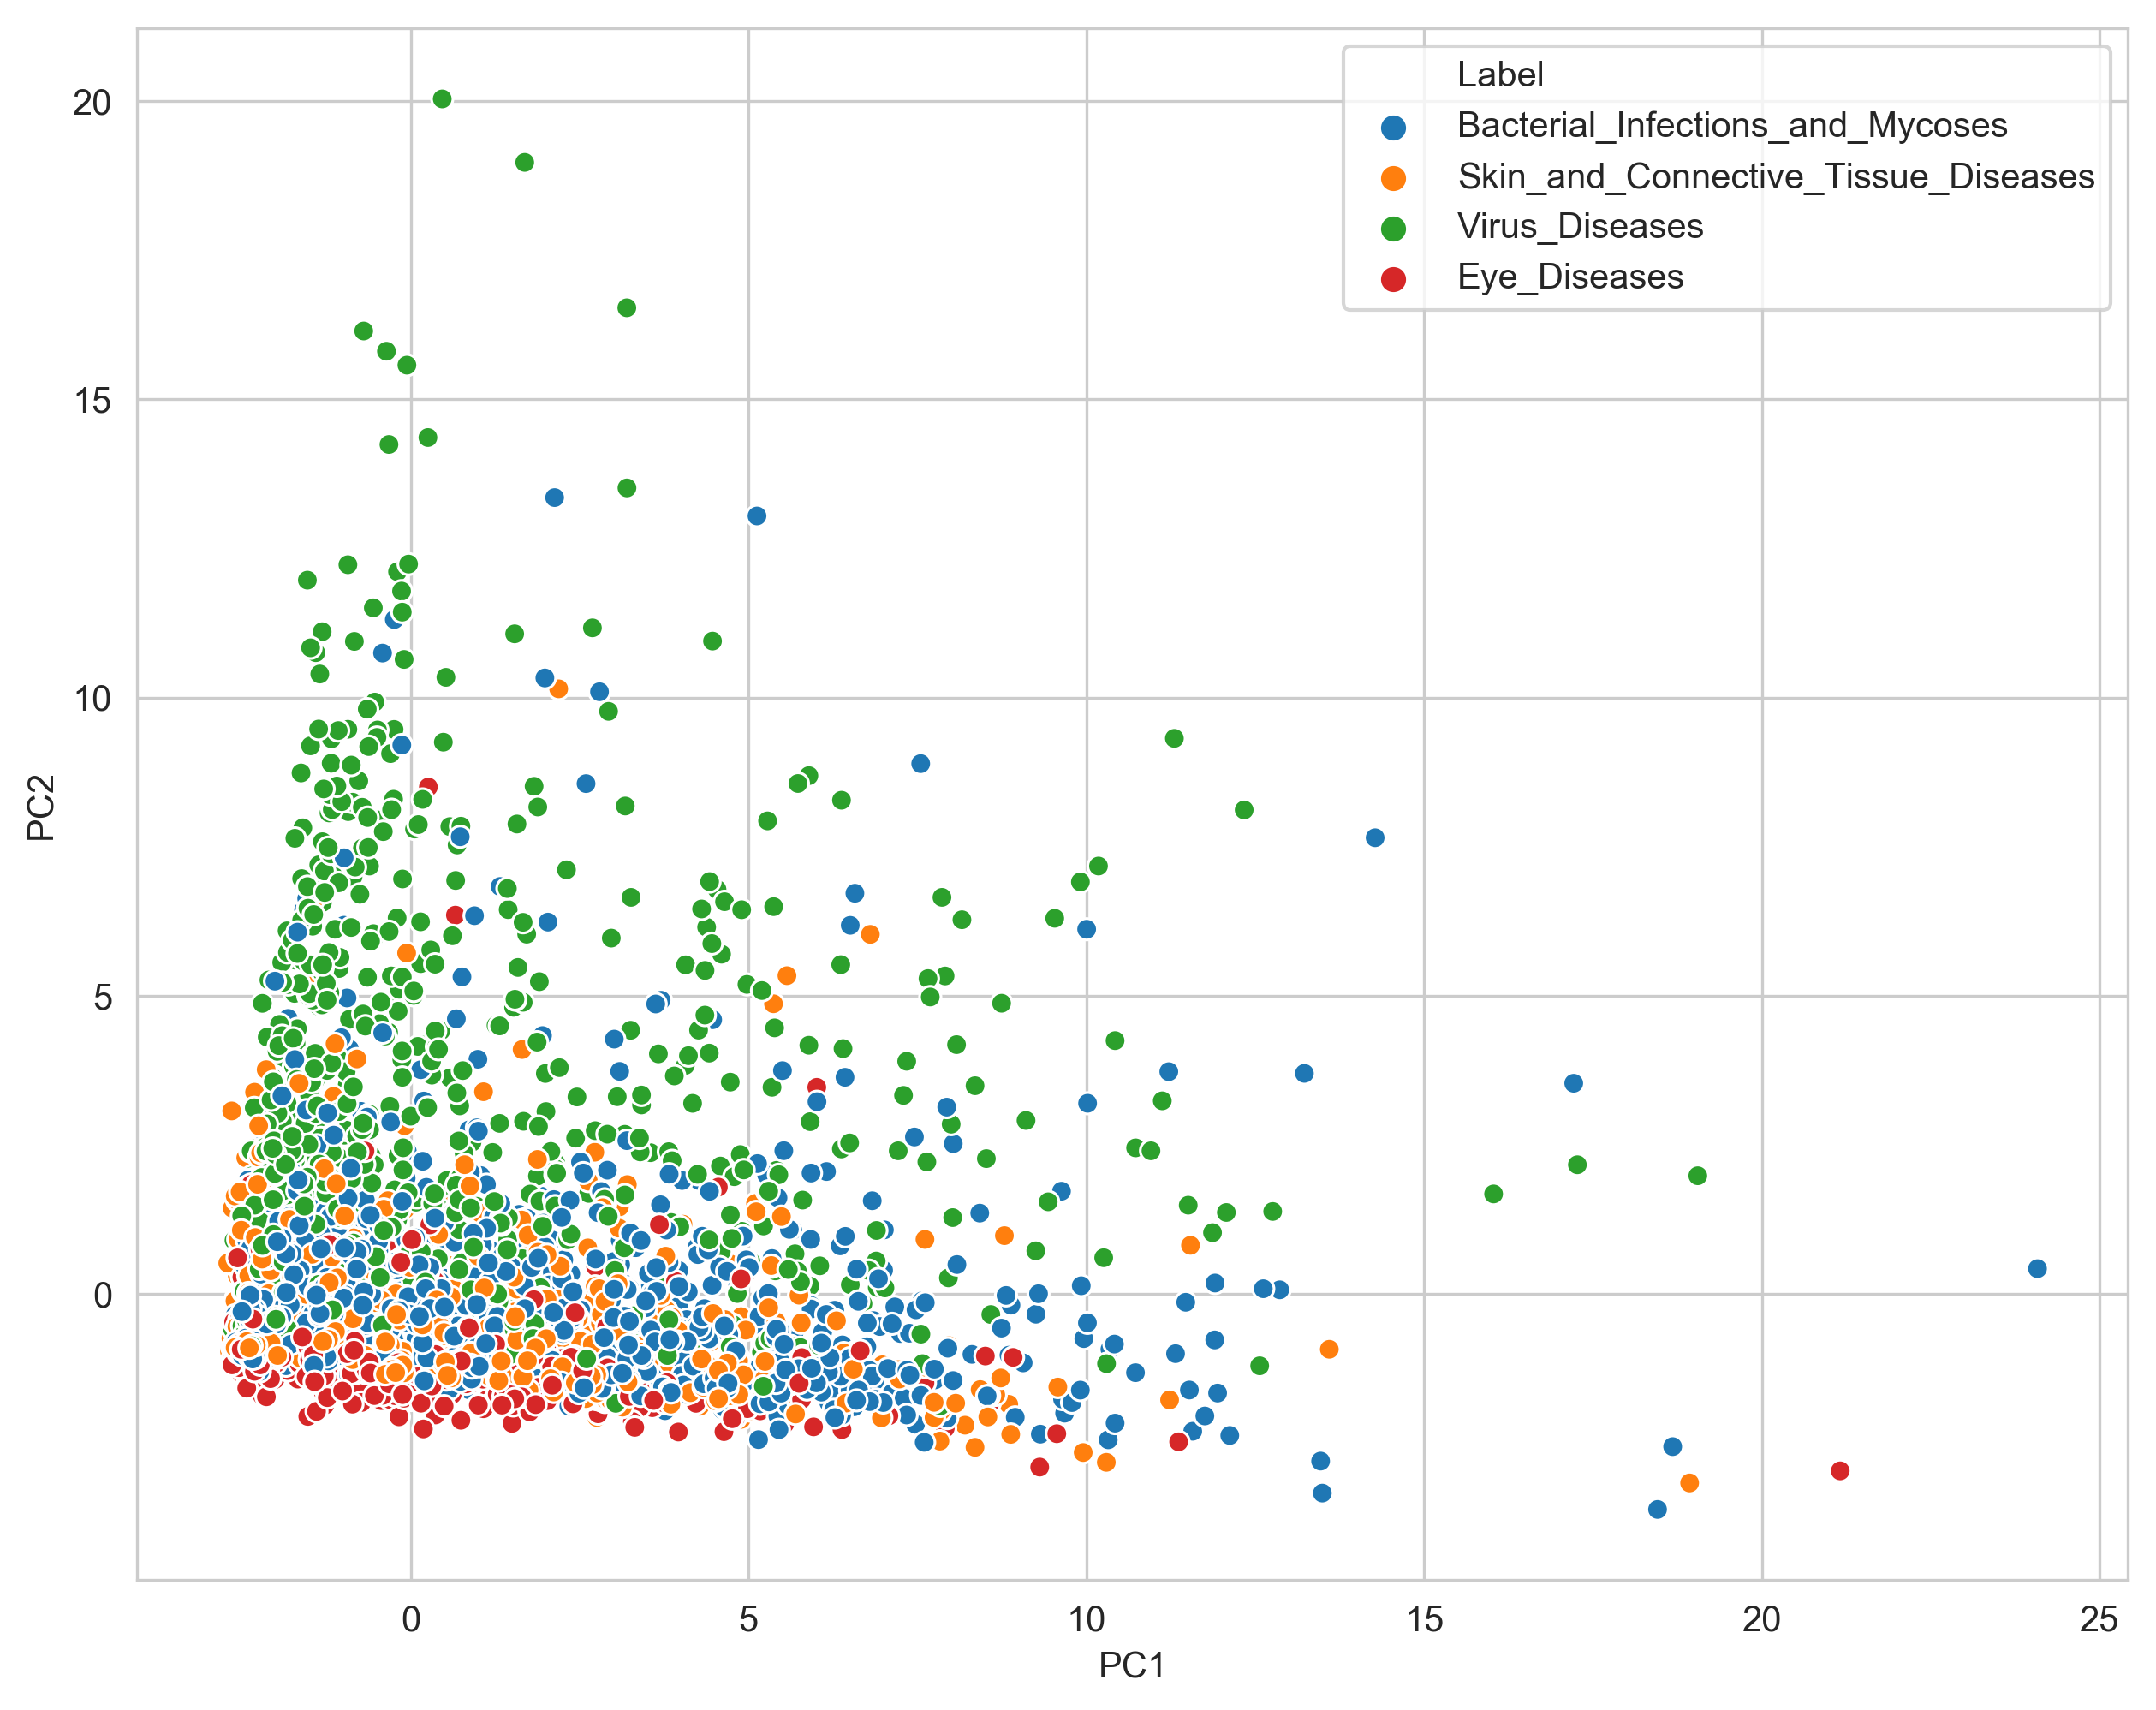

In [74]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=2)
PCs = sklearn_pca.fit_transform(X)
PCA_x = pd.DataFrame(PCs,columns=['PC1','PC2'])
PCA_x = pd.concat([PCA_x,dataset['Label']],axis=1)
fig, axes = plt.subplots(figsize=(10,8))
sns.set_style("whitegrid")
sns.scatterplot(x='PC1',y='PC2',data = PCA_x,hue='Label')

## Splitting the dataset into the Training set and Test set

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

## Building model

In [29]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Model Evaluation

In [30]:
predictions = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[597   7  25  14]
 [ 15 203  24   8]
 [ 26   2 406  10]
 [ 45   2  11 232]]


              precision    recall  f1-score   support

           0       0.87      0.93      0.90       643
           1       0.95      0.81      0.88       250
           2       0.87      0.91      0.89       444
           3       0.88      0.80      0.84       290

    accuracy                           0.88      1627
   macro avg       0.89      0.86      0.88      1627
weighted avg       0.89      0.88      0.88      1627



## Tfidf

In [75]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(X)
print(X.shape)
X = X.toarray()

(5422, 25953)


In [76]:
print(tfidf_transformer.idf_[cv.vocabulary_['lungs']])

5.934842800711414


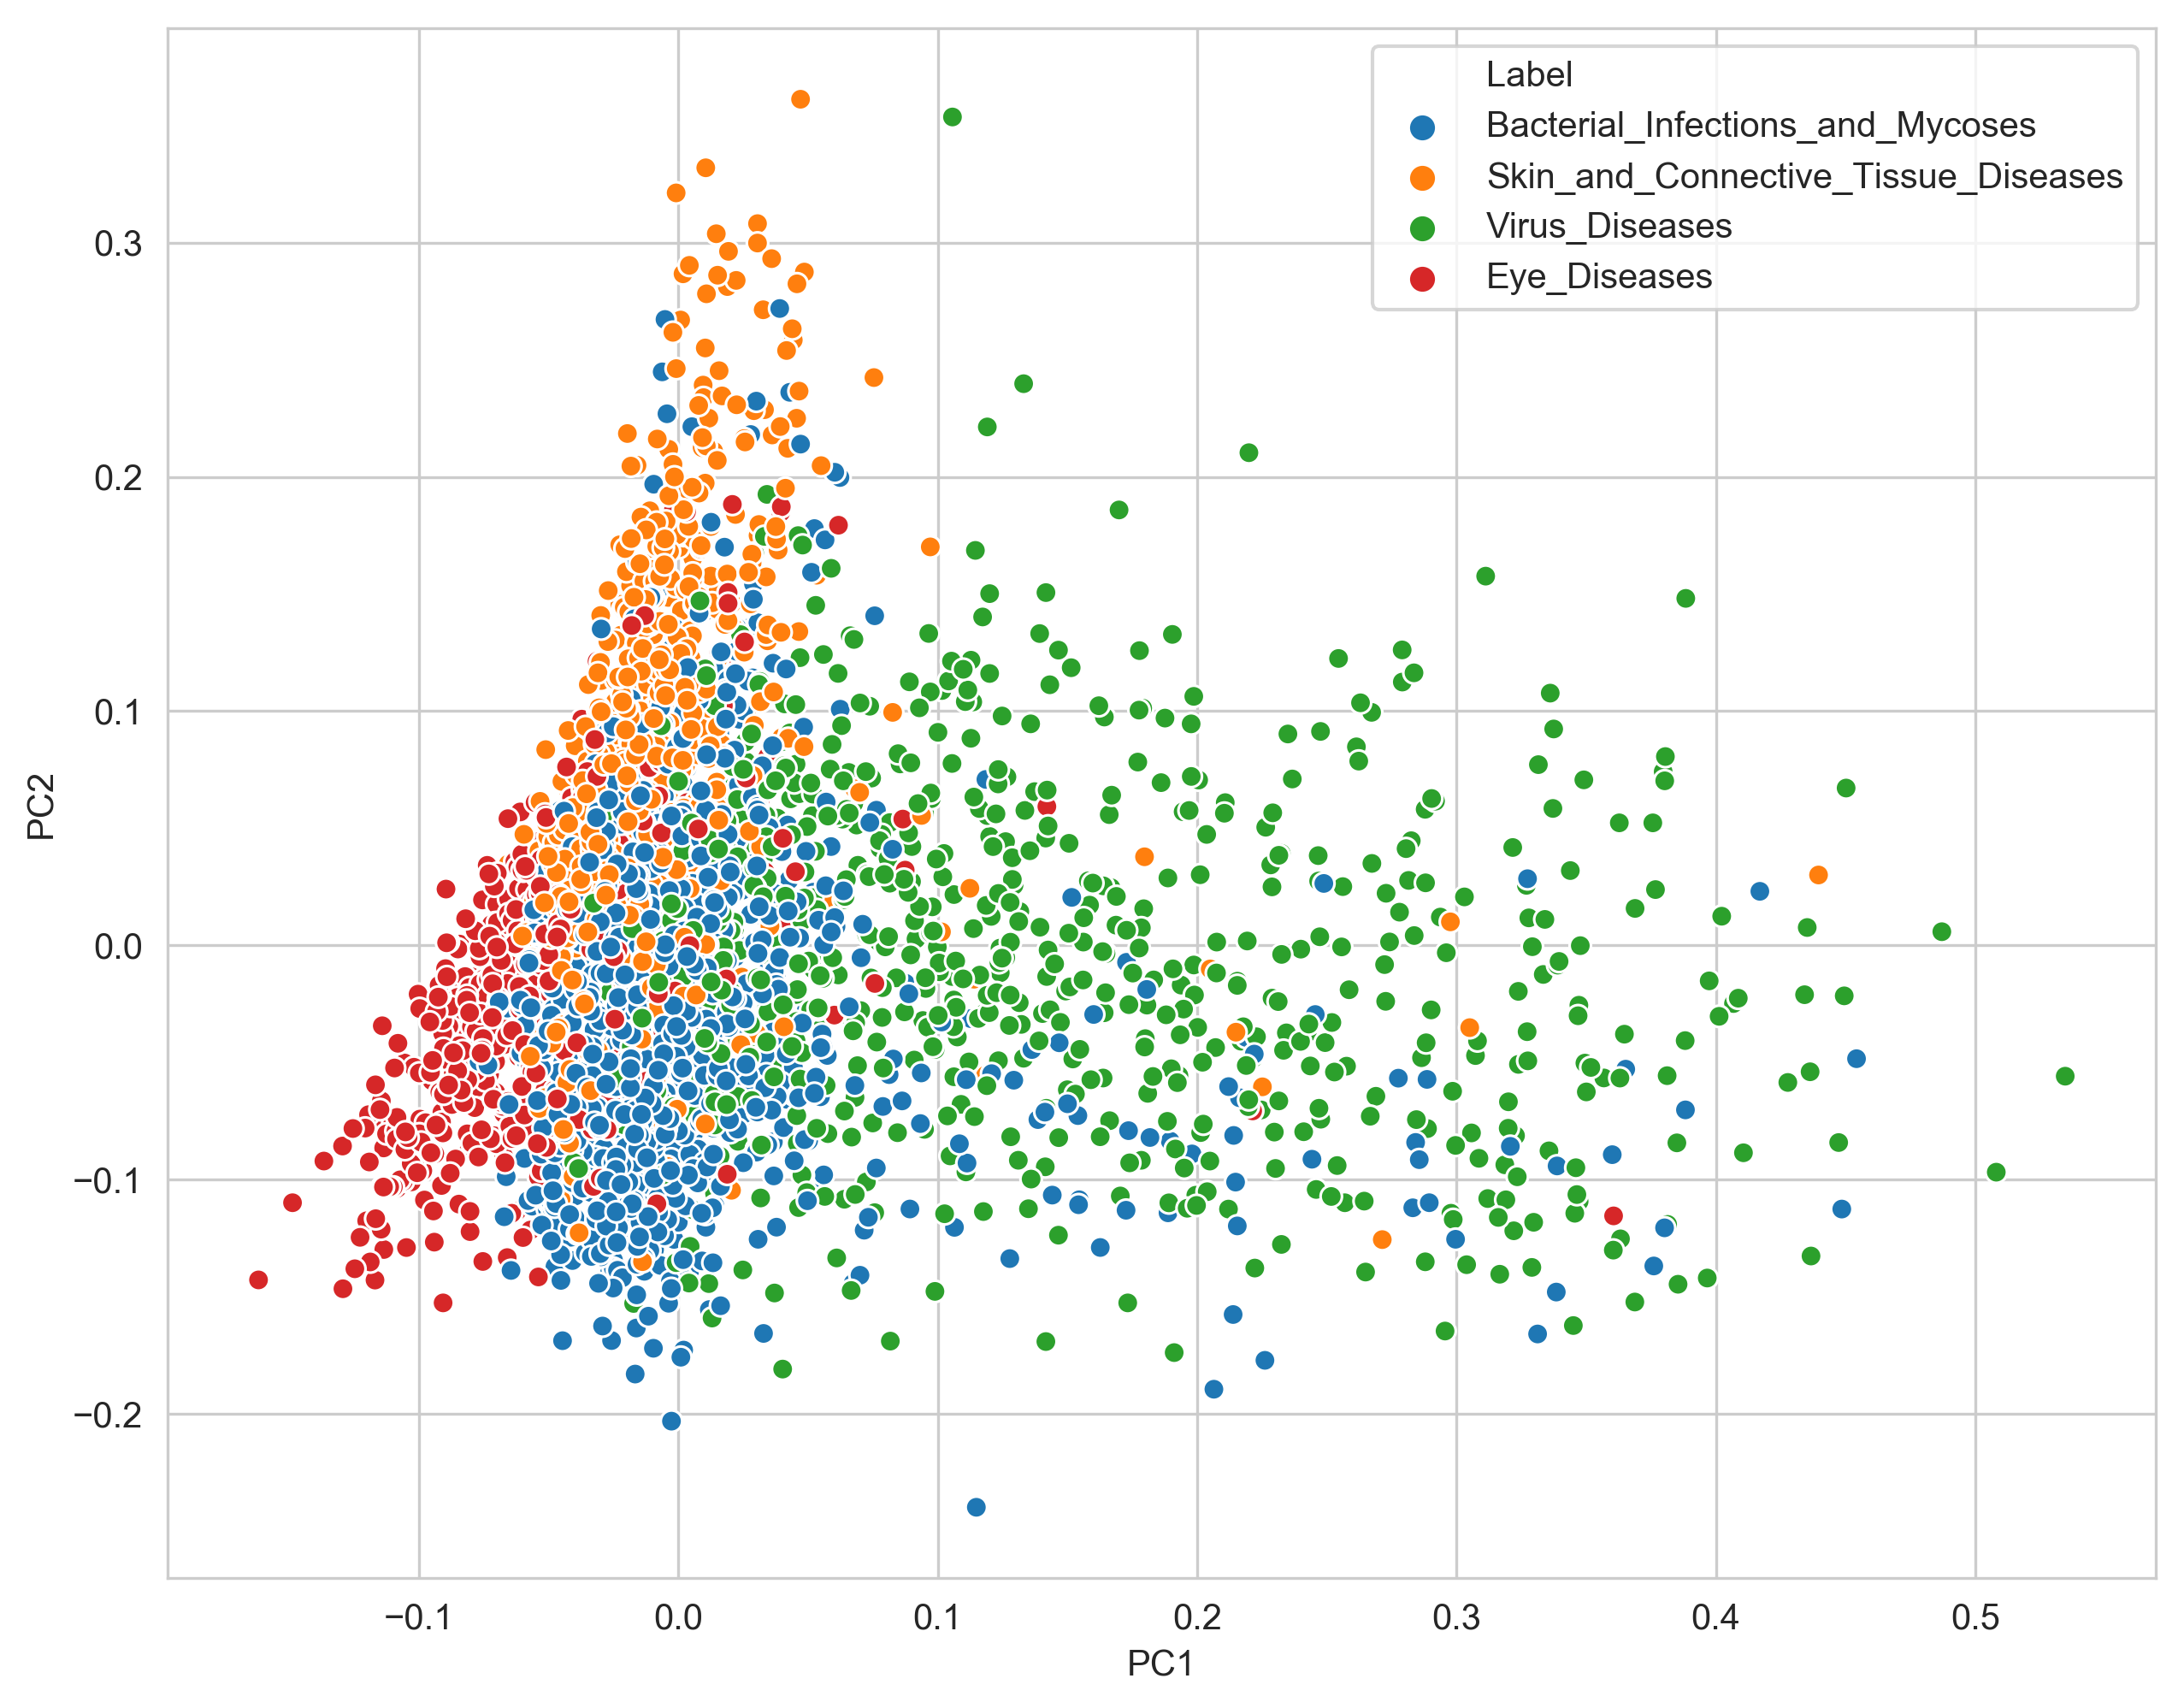

In [77]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=2)
PCs = sklearn_pca.fit_transform(X)
PCA_x = pd.DataFrame(PCs,columns=['PC1','PC2'])
PCA_x = pd.concat([PCA_x,dataset['Label']],axis=1)
fig, axes = plt.subplots(figsize=(10,8))
sns.set_style("whitegrid")
sns.scatterplot(x='PC1',y='PC2',data = PCA_x,hue='Label')

## Splitting the dataset into the Training set and Test set

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

## Building Model

In [45]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Model Evaluation

In [37]:
predictions = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[440   0   9   9]
 [ 20 115  19   1]
 [ 37   0 248   2]
 [ 46   0   8 131]]


              precision    recall  f1-score   support

           0       0.81      0.96      0.88       458
           1       1.00      0.74      0.85       155
           2       0.87      0.86      0.87       287
           3       0.92      0.71      0.80       185

    accuracy                           0.86      1085
   macro avg       0.90      0.82      0.85      1085
weighted avg       0.87      0.86      0.86      1085



# ANN in  NLP

## Label one-hot-encoding

In [50]:
y = dataset['Label']

from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y = lb.fit_transform(y)
y.shape

(5422, 4)

In [51]:
lb.classes_

array(['Bacterial_Infections_and_Mycoses', 'Eye_Diseases',
       'Skin_and_Connective_Tissue_Diseases', 'Virus_Diseases'],
      dtype='<U35')

In [52]:
y[800]

array([1, 0, 0, 0])

## Splitting the dataset into the Training set and Test set

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=101)

## Building model

In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
model = Sequential()

# 
model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=16,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=4,activation='softmax'))

# For a binary classification problem
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])


## Training 

In [61]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1)
model.fit(x=X_train, 
          y=y_train, 
          epochs=400,
          batch_size=128,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 4337 samples, validate on 1085 samples
Epoch 1/400
4337/4337 [==============================] - 3s 731us/sample - loss: 1.3367 - accuracy: 0.4111 - val_loss: 1.2627 - val_accuracy: 0.4240
Epoch 2/400
4337/4337 [==============================] - 1s 319us/sample - loss: 1.1821 - accuracy: 0.5063 - val_loss: 1.0708 - val_accuracy: 0.6009
Epoch 3/400
4337/4337 [==============================] - 1s 323us/sample - loss: 0.9981 - accuracy: 0.6039 - val_loss: 0.8742 - val_accuracy: 0.7687
Epoch 4/400
4337/4337 [==============================] - 1s 330us/sample - loss: 0.8229 - accuracy: 0.7016 - val_loss: 0.7045 - val_accuracy: 0.8470
Epoch 5/400
4337/4337 [==============================] - 1s 330us/sample - loss: 0.7034 - accuracy: 0.7473 - val_loss: 0.5840 - val_accuracy: 0.8673
Epoch 6/400
4337/4337 [==============================] - 1s 331us/sample - loss: 0.5918 - accuracy: 0.7996 - val_loss: 0.5004 - val_accuracy: 0.8876
Epoch 7/400
4337/4337 [==============================] - 1

## Model Evaluation

In [62]:
predictions = model.predict(X_test)


predictions = lb.inverse_transform(predictions)
y_test = lb.inverse_transform(y_test)

from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[414   2   7  14]
 [  6 134  13   1]
 [ 12   7 271   6]
 [ 23   2   5 168]]


                                     precision    recall  f1-score   support

   Bacterial_Infections_and_Mycoses       0.91      0.95      0.93       437
                       Eye_Diseases       0.92      0.87      0.90       154
Skin_and_Connective_Tissue_Diseases       0.92      0.92      0.92       296
                     Virus_Diseases       0.89      0.85      0.87       198

                           accuracy                           0.91      1085
                          macro avg       0.91      0.90      0.90      1085
                       weighted avg       0.91      0.91      0.91      1085



## New prediction

In [66]:
text = 'Memory T cells induced by previous pathogens can shape susceptibility to, and the clinical severity of, subsequent infections. Little is known about the presence in humans of pre-existing memory T cells that have the potential to recognize severe acute respiratory syndrome 2 (SARS-CoV-2). Here we studied T cell responses against the structural (nucleocapsid (N) protein) and non-structural (NSP7 and NSP13 of ORF1) regions of SARS-CoV-2'
print(text)

Memory T cells induced by previous pathogens can shape susceptibility to, and the clinical severity of, subsequent infections. Little is known about the presence in humans of pre-existing memory T cells that have the potential to recognize severe acute respiratory syndrome 2 (SARS-CoV-2). Here we studied T cell responses against the structural (nucleocapsid (N) protein) and non-structural (NSP7 and NSP13 of ORF1) regions of SARS-CoV-2


In [67]:
text = text_processing(text)
text = tfidf_transformer.transform(cv.transform([text]))
text.toarray()
text.shape

(1, 25953)

In [68]:
text = text.toarray()
prediction = model.predict(text)
prediction = lb.inverse_transform(prediction)
print(prediction)

['Virus_Diseases']
